In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('data/data.csv')

1. Size of the dataset and missing data

In [3]:
df.shape

(8732, 11)

In [4]:
df.columns

Index(['University', 'Department', 'Overall Pay', 'LW Ratio', 'Academic Year',
       'Program Year', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay',
       'Fees', 'Comments'],
      dtype='object')

In [5]:
# Was any data excluded
pd.isnull(df).any()

University        True
Department        True
Overall Pay       True
LW Ratio          True
Academic Year     True
Program Year      True
12 M Gross Pay    True
9 M Gross Pay     True
3 M Gross Pay     True
Fees              True
Comments          True
dtype: bool

Apparently, all the columns have missing values. Let's get more information about the missing values by visualizing the missing data.
The package missingno allows us to quickly visualize the missing data. (pip install missingno)

In [6]:
import missingno as msno

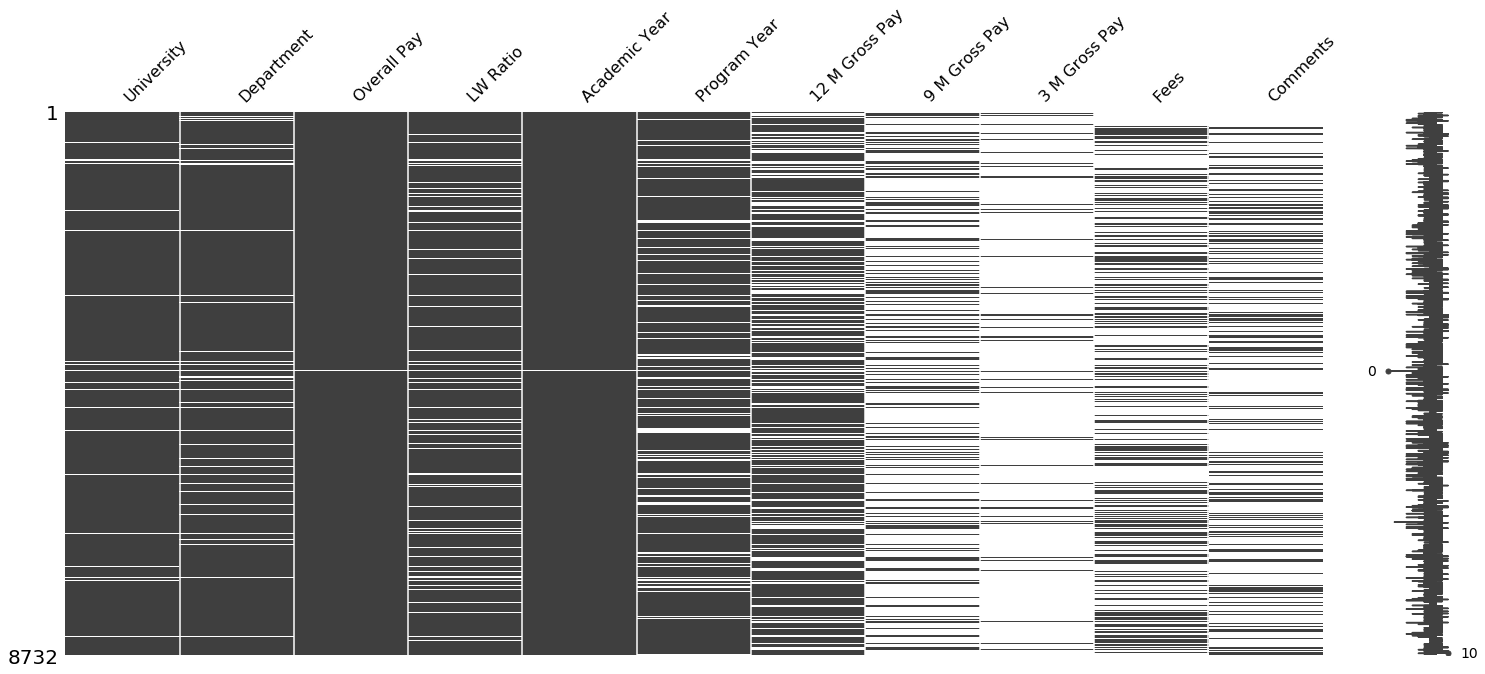

In [7]:
# Missingno matrix is a data-dense matrix which quickly displays the missing values.
msno.matrix(df)

The nullity matrix quickly showed the misisng values. Apparently most of the data in the right is empty. 

Let's visualize it clearly with bar diagram to see exactly how much data is missing.

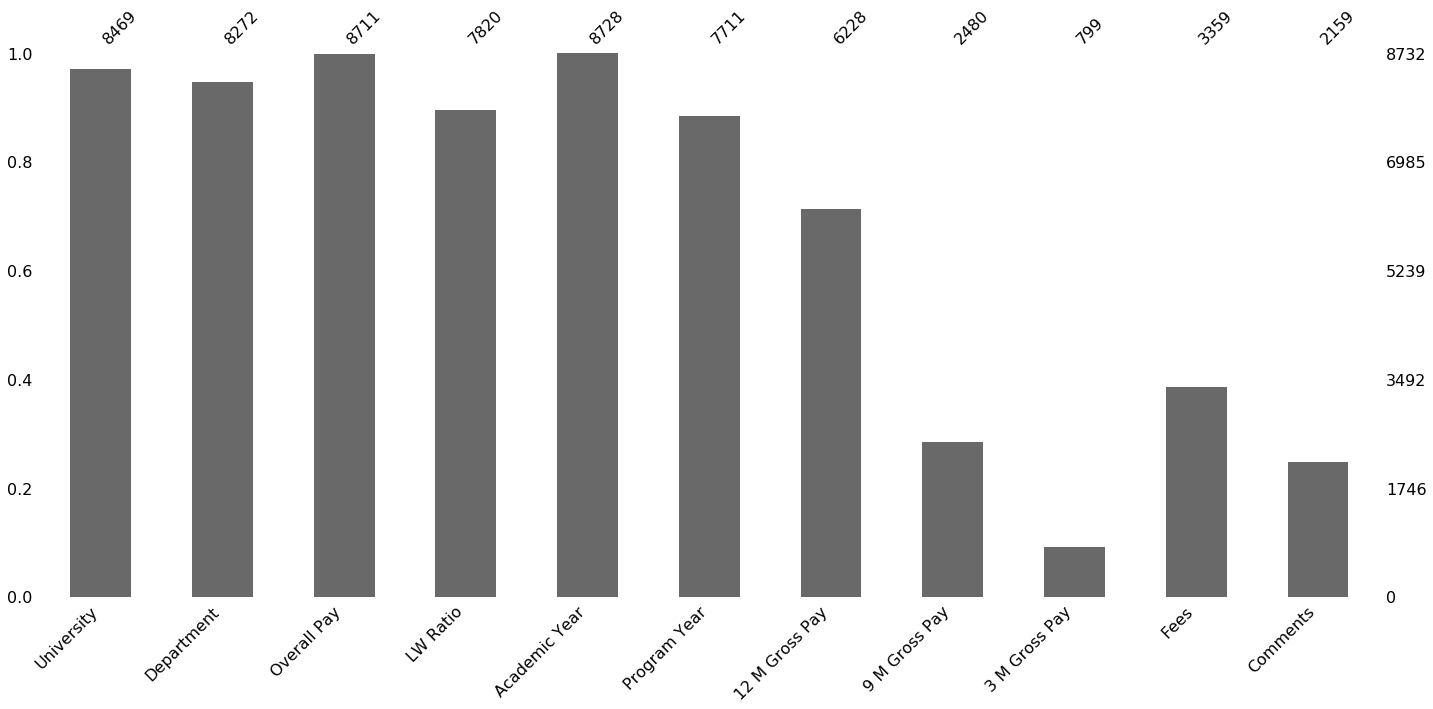

In [8]:
msno.bar(df)

Indeed, this datasets lacks plenty of data.
To start data cleansing, let's first check if the data is in correct format.

Since the university column also has some missing values. We could either remove those rows.

In [9]:
df = df.dropna(subset=['University'])
df.shape

(8469, 11)

Now we have a dataset with 8469 rows. Lets check missing values again

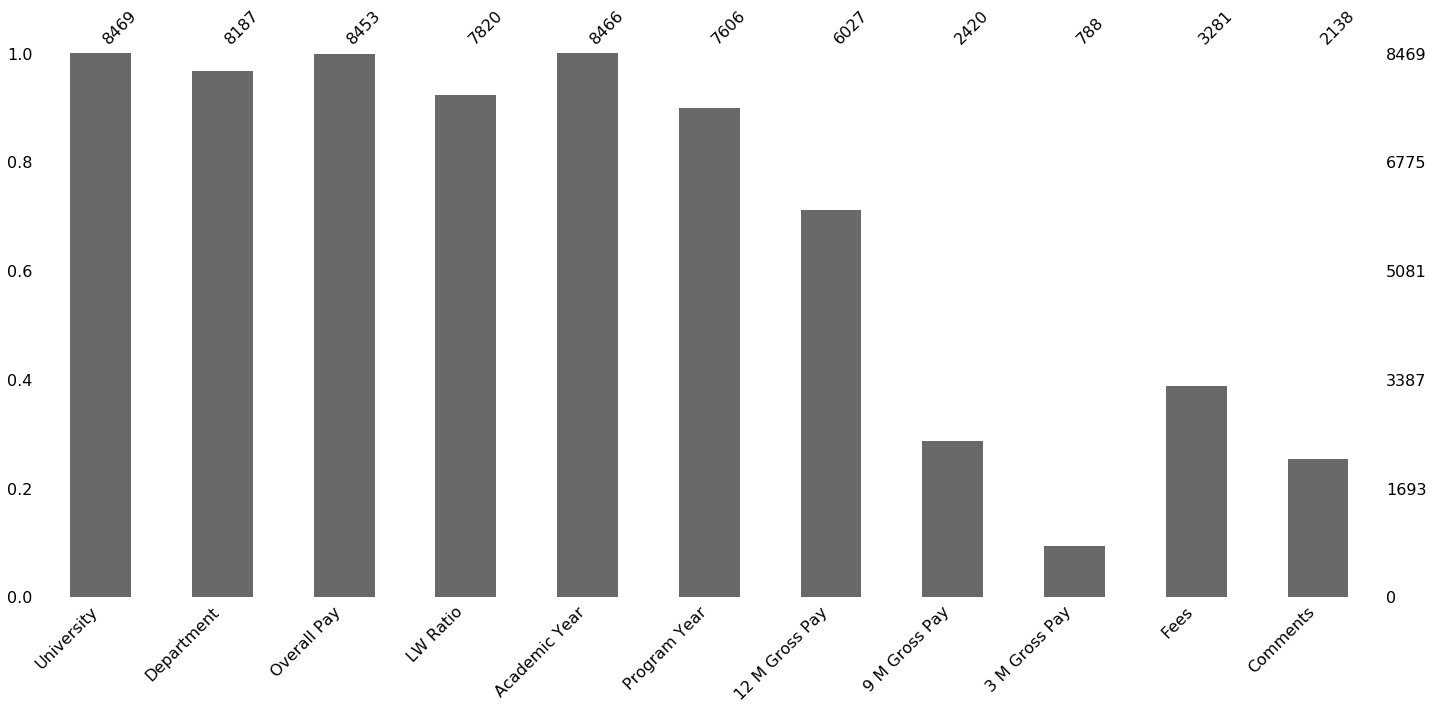

In [10]:
msno.bar(df)

We still more universities than overall pay. We do not need the rows with no overall pay. let's remove them too.

In [11]:
df = df.dropna(subset=['Overall Pay'])
df.shape

(8453, 11)

In [12]:
#Let's check the data types
df.dtypes

University         object
Department         object
Overall Pay        object
LW Ratio          float64
Academic Year      object
Program Year       object
12 M Gross Pay     object
9 M Gross Pay      object
3 M Gross Pay      object
Fees               object
Comments           object
dtype: object

Only 'LW ratio' seems to have float64 type, while 'Overall Pay', '12 M Gross Pay',	'9 M Gross Pay', '3 M Gross Pay', and	'Fees' too are expected to be numeric data.
Clean the amounts by removing the dollar sign and comma, and converting from string to float.

In [13]:
amount_columns = ['Overall Pay', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay','Fees']
for column in amount_columns:
  df[column] = df[column].str.replace('$','').str.replace(",","").astype(float)

Once we have proper datatype for the amounts, let's check if there are any outliers. 

Visualization is the best way to quickly spot the outliers. 

However, before visualization, describe() method can help us to find the outliers by looking at the std and min and max values.

In [14]:
df.describe()

,Overall Pay,LW Ratio,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees
count,8453.000000,7804.00000,6020.000000,2418.000000,788.000000,3272.000000
mean,25050.969715,1.07826,28129.359468,19638.997932,5029.989848,2760.888142
std,20829.012607,0.82718,20161.355856,8973.940506,3701.566838,18527.148499
min,-900000.000000,-34.01000,1.000000,5.000000,3.000000,1.000000
25%,19194.000000,0.85000,23329.750000,16000.000000,3000.000000,500.000000
50%,25000.000000,1.10000,28000.000000,19000.000000,4500.000000,1000.000000
75%,30500.000000,1.30000,32000.000000,23000.000000,6000.000000,2000.000000
max,994000.000000,40.97000,1000000.000000,189600.000000,55816.000000,1000000.000000


As we see, the max value is far higher than the 75th percentile. We can say it is an outlier. 

Let's check for outliers using boxplot

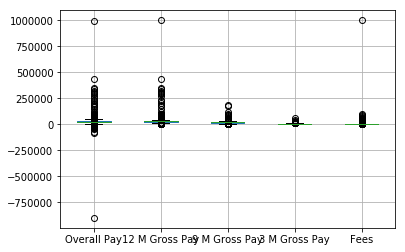

In [15]:
boxplot = df.boxplot(column=['Overall Pay', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay', 'Fees'])

In [16]:
outlier_overall_pay = df.loc[df['Overall Pay'] > 500000]
outlier_overall_pay

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
3136,Illinois Institute of Technology (IIT),Finance,994000.0,40.97,2018-2019,1st,1000000.0,NaN,NaN,6000.0,NaN


In [17]:
outlier_fee = df.loc[df['Fees'] > 500000]
outlier_fee

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
3375,University of California - San Diego (UCSD),Information Technology,-900000.0,-34.01,2018-2019,2nd,100000.0,NaN,NaN,1000000.0,NaN


We can see the outliers in Overall Pay, 12M gross pay and the fees columns.

In [18]:
df.shape

(8453, 11)

In [19]:
df = df.loc[df['Overall Pay'] < 500000]
df.shape

(8452, 11)

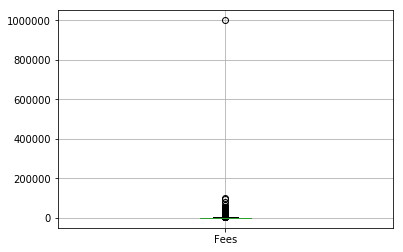

In [20]:
df.boxplot(column=['Fees'])

In [21]:
df['Fees'] = df['Fees'].replace(np.nan, 0)
df = df.loc[df['Fees'] < 200000]
df.shape

(8451, 11)

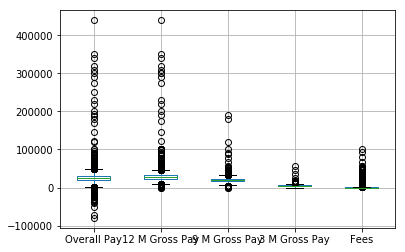

In [22]:
boxplot = df.boxplot(column=['Overall Pay', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay', 'Fees'])

### Universities

In [23]:
#Let's check how many universites we have.
len(df['University'].unique())

692

Total 692 unique universities were found. 

As the categorical data is prone to typos, some universities might have occurred more than once. One way is to check for similar names.

In [24]:
#TODO cound matching characters to detect typo. Typos may not exist in the dataset but it's worth checking.

Let's find the highest paying universities.


In [25]:
high_pay_university = df.groupby('University').agg({'Overall Pay':'max'}).sort_values('Overall Pay', ascending=False).head(10)

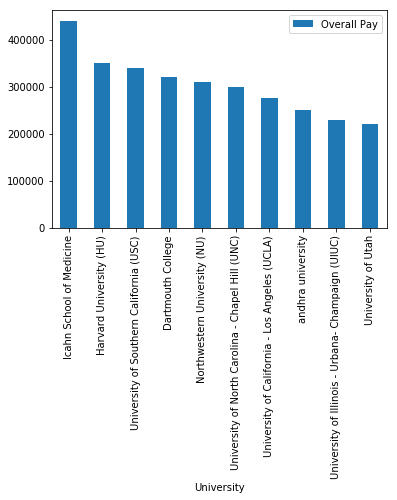

In [26]:
high_pay_university.plot(kind='bar')